## Hi
Making namespaces
> also this is a cheat sheet https://www.markdownguide.org/cheat-sheet/


In [1]:
#Hi
import csv
import pandas as pd
import glob
import os
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import savgol_filter
from scipy import signal
import seaborn as sns
import math
# Apply the default theme




from tkinter import Tk
from tkinter.filedialog import askdirectory
path = askdirectory(title='Select Folder') # shows dialog box and return the path
os.path.abspath(path)
files = glob.glob(os.path.join(path, "*.txt"))
path1 = os.path.basename(os.path.normpath(path))


#########################################################################################  #########################################################################################    
#style guidelines for Seaborne
sns.set(rc={"xtick.top" : True, "ytick.right" : True})
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})


#########################################################################################  #########################################################################################    


## function defining + classes

In [3]:

#some COOL functions
#test to see if we can go through a file
def turnCsvIntoDF(fullfile):
    df = pd.read_csv(fullfile, sep = "\t")
    
    
    return df
#take the file name and returns a unique name, plus relevant identifiers:
#relevant ident is: Sample name, temperature, Spinning speed, flowrate
#Returns as a TUPLE: (FullName, [Sample name, temperature, Denier, flowrate, spinning speed])
def returnName(filename):
    file1 = filename.replace(".txt","")
    NameInfo = file1.split("-")
    #print(NameInfo)
    thing = ""
    for idx, i in enumerate(NameInfo):
        if not idx == 2: 
            if not idx == 0:
                thing += "-"
            thing += i
    #print(NameInfo)    
    #print(thing)
    return (thing, NameInfo)
        

###################################
#Some classes

#holds data for each data point
#Takes in a dataframe and name
#identifierinfo is [Sample name, temperature, Denier, flowrate, spinning speed]
class dfData:
    def __init__(self, name, path1, indentifierInfo,filename):
        self.name = name 
        self.indentifierInfo = indentifierInfo
        self.df = turnCsvIntoDF(path1 +"/" +filename)
        #print(self.df)
        self.dfstatistics = self.statisticalAnalysis()
        
        
        
    def returnName(self):
        return self.name
    def returnIndet(self):
        return self.indentifierInfo
    def returnStat(self):
        return self.dfstatistics
    
    #returns Statistical data for certain params as seen below, as mean and stv
    def statisticalAnalysis(self):
        self.df = self.df[self.df["%Area"]<95].copy()
        self.length = self.df.shape[0]
        self.dfmean = pd.DataFrame(self.df.mean()).transpose()[["Area","Circ.","%Area","AR","Round","MinFeret"]].copy()
        
        self.dfstd = pd.DataFrame(self.df.std()).transpose()[["Area","Circ.","%Area","AR","Round","MinFeret"]].copy()
        #self.dfstd.rename(columns={"Area":"AreaSTD","Circ.":"CircSTD","%Area":"%AreaSTD","AR":"ARSTD","Round":"RoundSTD","MinFeret":"MinFeretSTD"}, inplace = True)
        
        self.dfFULL = self.dfmean.join(self.dfstd, lsuffix = "", rsuffix = "_std")
        #print(self.indentifierInfo)
        self.ident = pd.DataFrame([self.indentifierInfo], columns = ["Sample","Temperature","Denier","Flowrate","Spinning Speed"])
        self.ident["Name"] = self.indentifierInfo[0]+"-"+self.indentifierInfo[1]
        self.ident["n"] = self.length
        #print(self.ident)
        self.dfFULL = self.dfFULL.join(self.ident)
        self.dfFULL["95confidence"] = self.dfFULL["%Area_std"]/np.sqrt(self.dfFULL["n"])*1.96
        self.dfFULL = self.dfFULL.apply(pd.to_numeric, errors='ignore')
        #print(self.dfFULL.dtypes)
         
        return self.dfFULL
        
#Holds the DF data, and calls operations on the df Data
class dfHolder:
    def __init__(self):
        self.dictionRheo = {}
        self.rheoData = pd.read_csv("../RelaxationTimeCalcs.csv")
        
        print(self.rheoData)
        
    #Adds a dfdata to a dictionary
    def addValue(self, filename, path):
        self.nameTuple = returnName(filename)
        self.path1 = path
        #print(self.nameTuple[1])
        self.dictionRheo[self.nameTuple[0]] = dfData(self.nameTuple[0], self.path1, self.nameTuple[1], filename)
        
        
    #gives DF of values we have: 
    #form: Hash key, PP type, temp, denier, flowrate, spinning speed
    def dfReturn(self):
        self.dfMaker = []
        for i in self.dictionRheo:
            self.name1 = [self.dictionRheo[i].returnName()]
            #print(self.name1)
            self.nameinfo = self.dictionRheo[i].returnIndet()
            self.name1.extend(self.nameinfo)
            
            self.dfMaker.append(self.name1)
            
        self.columns = ['HashKey', 'PPtype', 'Temp', 'Denier', 'Flowrate', 'SpinningSpeed']
        self.dfFull = pd.DataFrame(self.dfMaker,columns = self.columns)
        #print(self.dfFull)
        return self.dfFull
    
    def returnStasticialValues(self):
        self.totalStat = []
        for i in self.dictionRheo:
            self.totalStat.append(self.dictionRheo[i].returnStat())
            
        self.totalDf = pd.concat(self.totalStat).reset_index()
        
        self.returned = pd.merge(self.totalDf,self.rheoData, on = "Name")
        
        return self.returned
    
    def dfStatReturn(self, identifier):
        return self.dictionRheo[identifier].statisticalAnalysis()
            
    def printKeys(self):
        return self.dictionRheo.keys()
        

## Class init

## HELLO, this is for parsing through the data 
>We are also initializing here

In [4]:
#########################################################################################  #########################################################################################    
#some intializiation
#THESE SHOULD BE DICTIONARIES, CHECK INTO THIS
vStrain = []
vRate = []
strains = [100,10,1]
loadings = []
pdmstype = []
blerp = dfHolder()
#########################################################################################  #########################################################################################    



for path, dirs, files in os.walk(path):
    print("Path:", path)

    print ("\nDirs:")
    for d in dirs:
        print ('\t'+d)

    
        
    print ("\nFiles:")  
    

    for f in files:
        
        filename = os.path.basename(f)
        
        
        if(filename.endswith('.txt')):
            fullfile = path +"/" +filename
            print(fullfile)
            returnName(filename)
        
            blerp.addValue(filename, path)
           
            
            
            

            
            #plotData(data1,name, n)
           
                


    
        
        
        
        
    print("Finished for loop")
       

        
        
    print ("----")
    
splerp = pd.read_csv("../35denierFiberData.csv")
print(splerp)
dfTotal = blerp.dfReturn()

#print(blerp.printKeys())




        Name  Unnamed: 1                        Filename   SName  \
0   3155-210         NaN                             NaN    3155   
1   3155-230         8.0        PP3155_230_1-17-22_S1_p2    3155   
2     M1-210        17.0              S1-210-PP-02072022      S1   
3     M1-230        19.0         S1_230_Sample1_01212022      S1   
4     M1-250        18.0              S1-250-PP-02082022      S1   
5     M2-210        20.0            S2-210-PP-02072022-2      S2   
6     M2-250        21.0              S2-250-PP-02082022      S2   
7     M3-210        23.0              S3-210-S3-03082022      S3   
8     M3-230        26.0         S3_230_Sample1_01212022      S3   
9     M3-250        24.0             S3-250-S10-03082022      S3   
10    M4-210        27.0              S4-210-PP-02072022      S4   
11    M4-230        29.0             S4_Sample1_01212022      S4   
12    M4-250        28.0          S4-250-PP-02082022 (1)      S4   
13    M5-210        30.0          S5-210-PP-0207

index                     int64
Area                    float64
Circ.                   float64
%Area                   float64
AR                      float64
Round                   float64
MinFeret                float64
Area_std                float64
Circ._std               float64
%Area_std               float64
AR_std                  float64
Round_std               float64
MinFeret_std            float64
Sample                   object
Temperature_x             int64
Denier                  float64
Flowrate                float64
Spinning Speed          float64
Name                     object
n                         int64
95confidence            float64
Unnamed: 1              float64
Filename                 object
SName                    object
Zero Shear viscosity    float64
Relaxation Time         float64
Temperature_y             int64
Gc                      float64
Gpps                    float64
Gps                     float64
SampleName               object
Ident   

<Figure size 10800x10800 with 0 Axes>

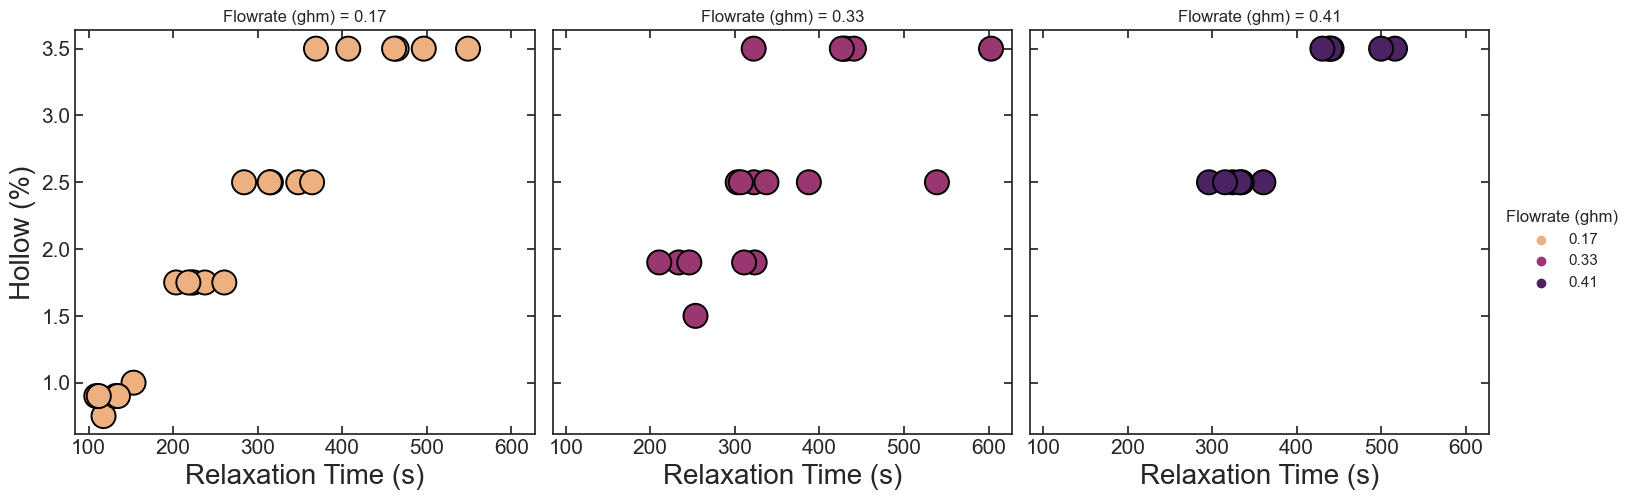

<Figure size 640x480 with 0 Axes>

In [5]:
data = blerp.returnStasticialValues()
print(data.dtypes)
data["Hollow"] = 100-data["%Area"]
data["Temperature (C)"] = data["Temperature_y"]
data["Flowrate (ghm)"] = data["Flowrate"]
#data.to_csv("thing.csv")

#print(data)
#data = data[(data.Flowrate <0.40)]#&(data.Flowrate <0.40)]#
#data = data[(data.Flowrate >0.19)&(data.Flowrate <0.40)]
sns.set(rc={"xtick.top" : True, "ytick.right" : True},font_scale = 20)
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")


sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
plt.figure(figsize = (6,6), dpi = 1800)
#have to do 2 different ifs due to two different datatypes with diff variables names
"""a1 = sns.relplot(
    data=data, kind = "line",
    x="Relaxation Time", y="Hollow",  markers = True, linewidth = 2,markersize=10,
     ci = False,markeredgecolor='none', palette = "crest",facet_kws=dict(despine=False)
    );"""

a1 = sns.relplot(
    data=data, kind = "scatter", col = "Flowrate (ghm)",
    x="Area", y="Denier", hue = "Flowrate (ghm)",  palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
#a1.set_titles("")
a1.set_axis_labels( "Relaxation Time (s)",  "Hollow (%)", fontsize = 20)

for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 15)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 15)
#a1.set_axis_labels("Linear Density [Denier]", "Hollownes (%)", fontsize = 20)
#a1.map(plt.errorbar,"Spinning Speed","%Area","%Area_std", linestyle = "")
#a1.set(xscale="log",yscale="log")
plt.tick_params(which = 'both', right=True,top=True)

        #df_melted = pd.melt(df,id_vars=["NormalizedStrainRate-Smoothed"], value_vars=["NormalizedElasticStress-Smoothed","NormalizedStress-Smoothed"])
    #a1.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
    #a1.set(xlabel=None,ylabel=None,yticklabels=[],xticklabels=[])
a1.savefig("fullrelax.png")
plt.show()
plt.clf()

    index        Area     Circ.      %Area        AR     Round   MinFeret  \
6       0  464.460463  0.875411  78.897589  1.063705  0.941379  23.507863   
7       0  431.233045  0.891352  80.354943  1.043932  0.958386  22.412614   
8       0  441.325189  0.861989  78.760978  1.068578  0.939011  22.585367   
15      0  461.379711  0.853410  86.240759  1.073904  0.938096  23.274133   
16      0  428.459790  0.845600  82.642950  1.116150  0.901800  22.216610   
17      0  437.376112  0.833697  80.874955  1.099618  0.911461  22.620101   
26      0  407.126809  0.883455  71.342209  1.061273  0.943836  21.758027   
27      0  602.972095  0.856838  70.551351  1.045824  0.957297  26.505446   
28      0  516.321275  0.876220  72.441879  1.059835  0.949341  24.538791   
33      0  496.485670  0.868143  77.920659  1.035231  0.966571  24.493341   
34      0  440.806716  0.884621  76.664316  1.035221  0.966968  22.983432   
35      0  439.705327  0.886133  75.412653  1.045684  0.957286  22.896245   

<Figure size 6000x6000 with 0 Axes>

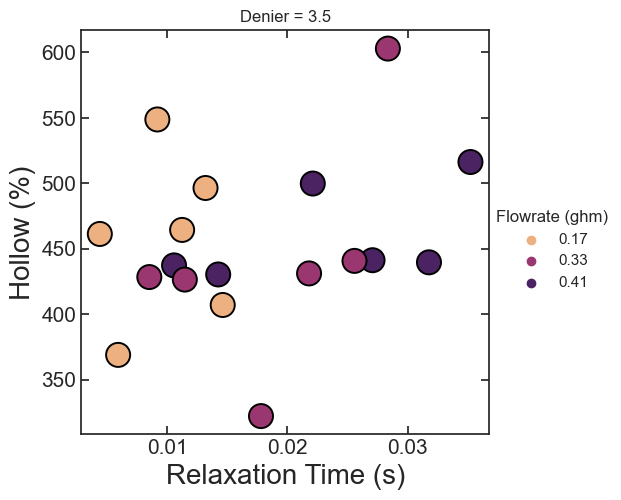

<Figure size 640x480 with 0 Axes>

In [27]:
sns.set(rc={"xtick.top" : True, "ytick.right" : True},font_scale = 20)
sns.set_theme()  
sns.set_style(style='white')
sns.set_style("ticks")

data["processtime"] = 0.029670358/data["Flowrate"]
data["nonDimTime"] = data["Relaxation Time"]/data["processtime"]
data["truearea"] = data["Area"]/data["%Area"]
#data["Hollow"] = data["Hollow"]*100
data = data[(data.Denier == 3.5)]
print(data)

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
plt.figure(figsize = (6,6), dpi = 1000)
#have to do 2 different ifs due to two different datatypes with diff variables names
"""a1 = sns.relplot(
    data=data, kind = "line",
    x="Relaxation Time", y="Hollow",  markers = True, linewidth = 2,markersize=10,
     ci = False,markeredgecolor='none', palette = "crest",facet_kws=dict(despine=False)
    );"""

a1 = sns.relplot(
    data=data, kind = "scatter", col = "Denier",
    x="nonDimTime", y="Area", hue = "Flowrate (ghm)",  palette = "flare",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );
#a1.set_titles("")
a1.set_axis_labels( "Relaxation Time (s)",  "Hollow (%)", fontsize = 20)

for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 15)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 15)
#a1.set_axis_labels("Linear Density [Denier]", "Hollownes (%)", fontsize = 20)
#a1.map(plt.errorbar,"Spinning Speed","%Area","%Area_std", linestyle = "")
#a1.set(xscale="log",yscale="log")
plt.tick_params(which = 'both', right=True,top=True)

        #df_melted = pd.melt(df,id_vars=["NormalizedStrainRate-Smoothed"], value_vars=["NormalizedElasticStress-Smoothed","NormalizedStress-Smoothed"])
    #a1.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
    #a1.set(xlabel=None,ylabel=None,yticklabels=[],xticklabels=[])
a1.savefig("I:/My Drive/Research/NWI/Final Paper/RawData/RawFigures/35denierfromFinalarea.png", dpi = 800)
plt.show()
plt.clf()

              Filename  Number of Samples Polymer Type  Temperature  \
0      M1-210-0,17@437                 42           M1          210   
1   M1-210-0,25@643CFD                 34           M1          210   
2      M1-210-0,33@848                 33           M1          210   
3     M1-210-0,41@1054                 40           M1          210   
4      P2-210-0,33@848                 43           P2          210   
..                 ...                ...          ...          ...   
69     P3-250-0,11@282                 36           P3          250   
70     P3-250-0,17@437                 39           P3          250   
71     P3-250-0,25@643                 32           P3          250   
72     P3-250-0,33@848                 35           P3          250   
73    P3-250-0,41@1054                 31           P3          250   

    Spinning Speed  Sample  Was CFD? Identifier  Zero Shear Viscosity  \
0             0.17       1         0     M1-210              352.3012   
1

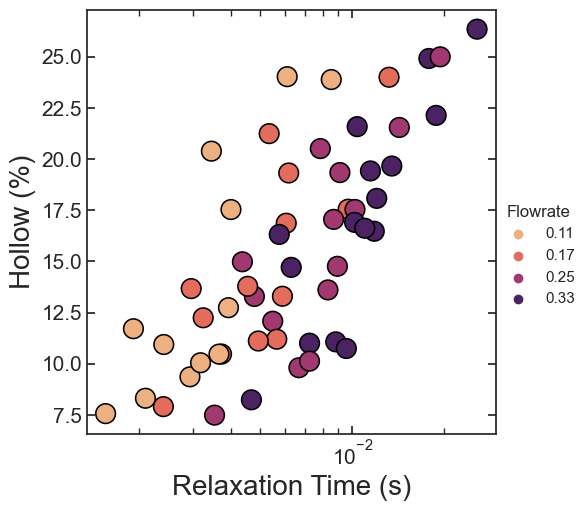

In [28]:
splerp = pd.read_csv("../35denierFiberData.csv")
splerp["processtime"] = 0.029670358/splerp["Spinning Speed"]
splerp["nonDimTime"] = splerp["Relaxation Time"]/splerp["processtime"]
print(splerp)
splerp["TotalArea"] = splerp["Average Area"]/(1-splerp["Hollow"])
splerp["Hollow"] = splerp["Hollow"]*100 
splerp["Flowrate"] = splerp["Spinning Speed"]
splerp = splerp[(splerp.Flowrate <0.40)]
a1 = sns.relplot(
    data=splerp, kind = "scatter", hue = "Flowrate",#style = "Relaxation Time",
    x="nonDimTime", y="Hollow",    palette = "flare",facet_kws=dict(despine=False), s = 200, edgecolor = "black"
    );

a1.set_axis_labels( "Relaxation Time (s)",  "Hollow (%)", fontsize = 20)

for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 15)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 15)
        
a1.set(xscale="log")
        
a1.savefig("I:/My Drive/Research/NWI/Final Paper/RawData/RawFigures/CompareHollow.png")
splerp.to_excel("I:/My Drive/Research/NWI/Final Paper/RawData/RawFigures/expDataOut.xlsx") 


              Filename  Number of Samples Polymer Type  Temperature  \
0      M1-210-0,17@437                 42           M1          210   
1   M1-210-0,25@643CFD                 34           M1          210   
2      M1-210-0,33@848                 33           M1          210   
3     M1-210-0,41@1054                 40           M1          210   
4      P2-210-0,33@848                 43           P2          210   
..                 ...                ...          ...          ...   
69     P3-250-0,11@282                 36           P3          250   
70     P3-250-0,17@437                 39           P3          250   
71     P3-250-0,25@643                 32           P3          250   
72     P3-250-0,33@848                 35           P3          250   
73    P3-250-0,41@1054                 31           P3          250   

    Spinning Speed  Sample  Was CFD? Identifier  Zero Shear Viscosity  \
0             0.17       1         0     M1-210              352.3012   
1

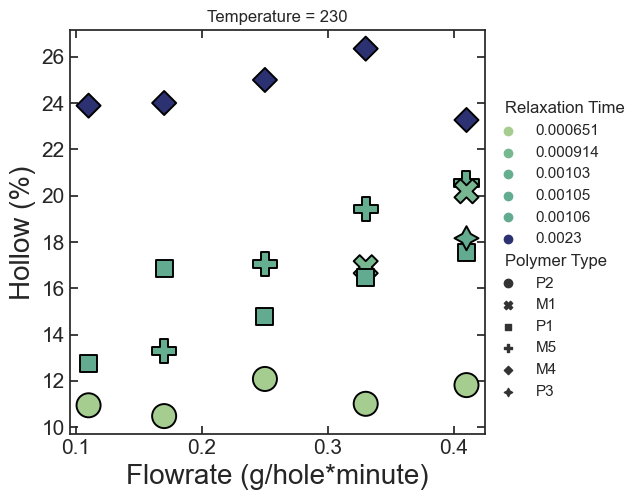

In [37]:
splerp = pd.read_csv("../35denierFiberData.csv")
print(splerp)
splerp["TotalArea"] = splerp["Average Area"]/(1-splerp["Hollow"])
splerp["Hollow"] = splerp["Hollow"]*100 
splerp["Flowrate"] = splerp["Spinning Speed"]
splerp = splerp[(splerp.Temperature ==230)]
a1 = sns.relplot(
    data=splerp, kind = "scatter", row = "Temperature", hue = "Relaxation Time", style = "Polymer Type",#, col_wrap = 5, #style = "Relaxation Time",
    x="Flowrate", y="Hollow",  palette = "crest",facet_kws=dict(despine=False), s = 300, edgecolor = "black"
    );

a1.set_axis_labels( "Flowrate (g/hole*minute)",  "Hollow (%)", fontsize = 20)

for ax in a1.axes.ravel():
        
        ax.tick_params(which="both", right=True, labelsize = 15)
        ax.tick_params(which="both", top=True)
        ax.tick_params(which = "both",left=True, labelsize = 15)
        
        
a1.savefig("I:/My Drive/Research/NWI/Final Paper/RawData/RawFigures/HollowvsFlowrateConstantDenierName2.png", dpi = 600)